In [1]:
import sys
sys.path.append('./util_function/')  # Make sure this path is correct relative to your current working directory.

from function_data_preprocessing import *
from function_model import *
from function_evaluate import *
from util_function.function_model import CNN_Model,Bilstm_Model,CNN_Bilstm_sequential_Model,CNN_Bilstm_parallel_Model
from util_function.function_evaluate import evaluate_and_save_results
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from IPython.display import Image


This is the model architecture of Autoencoder:


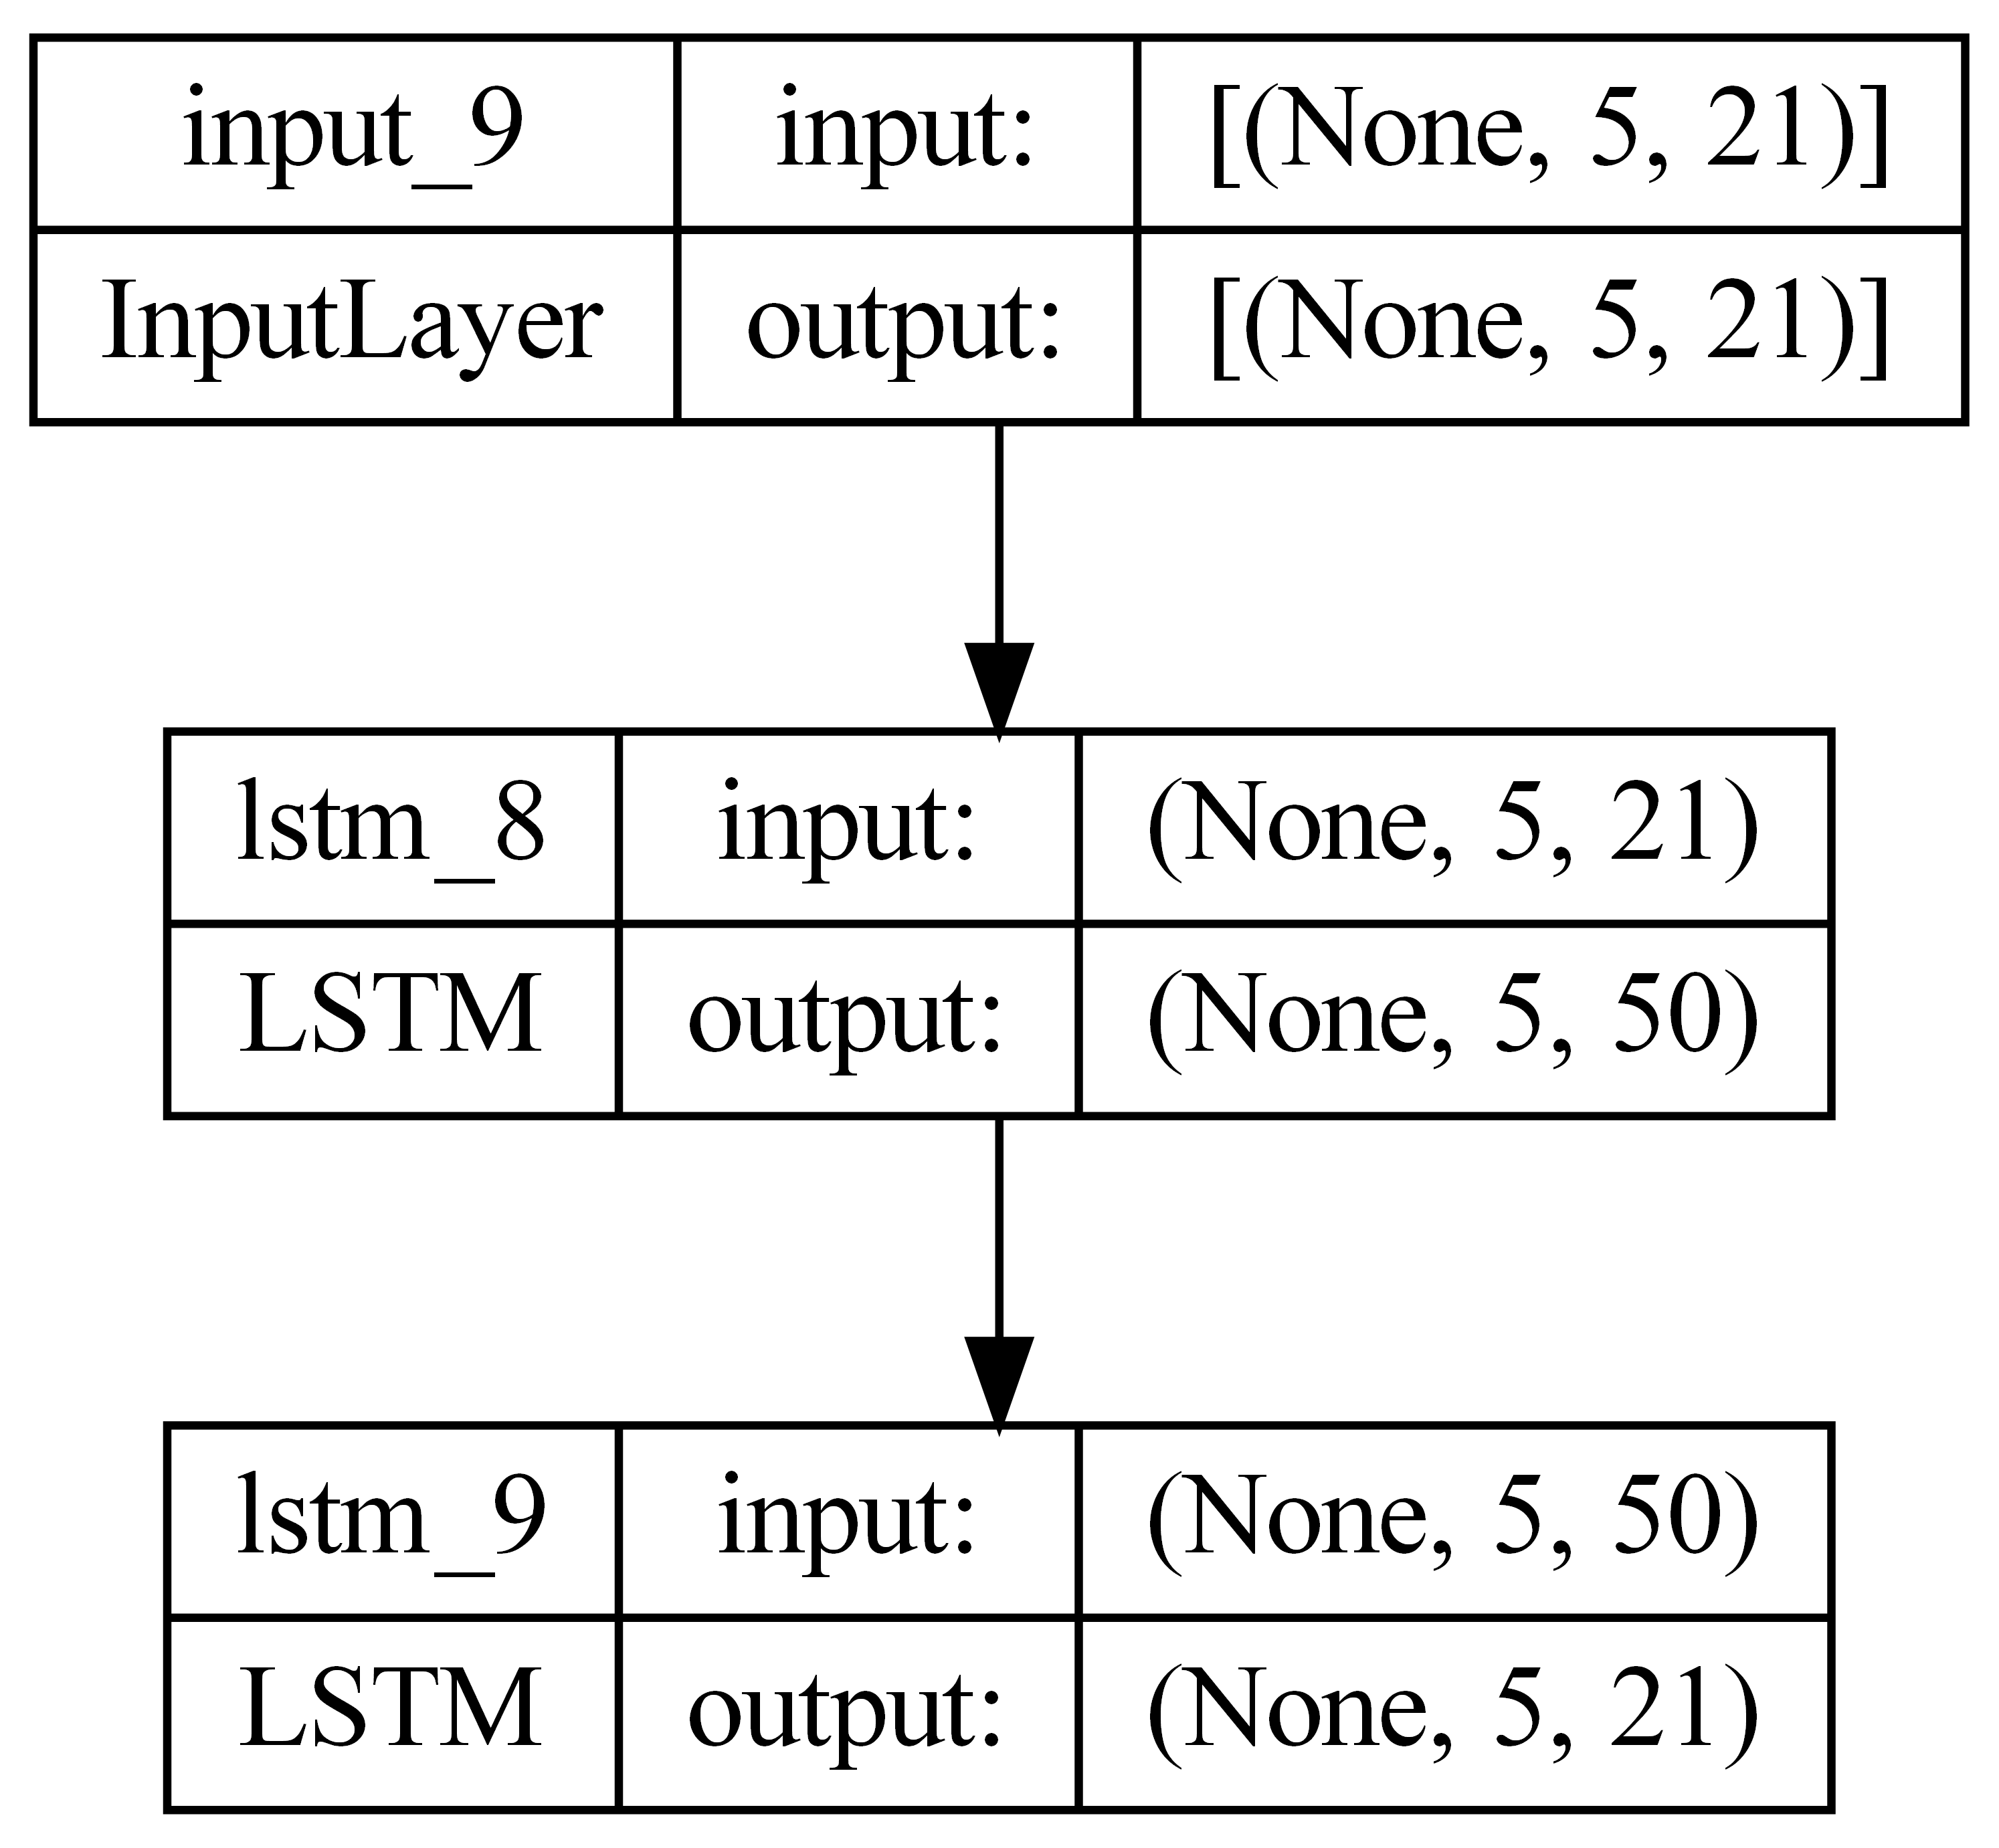

This is the model architecture of CNN:


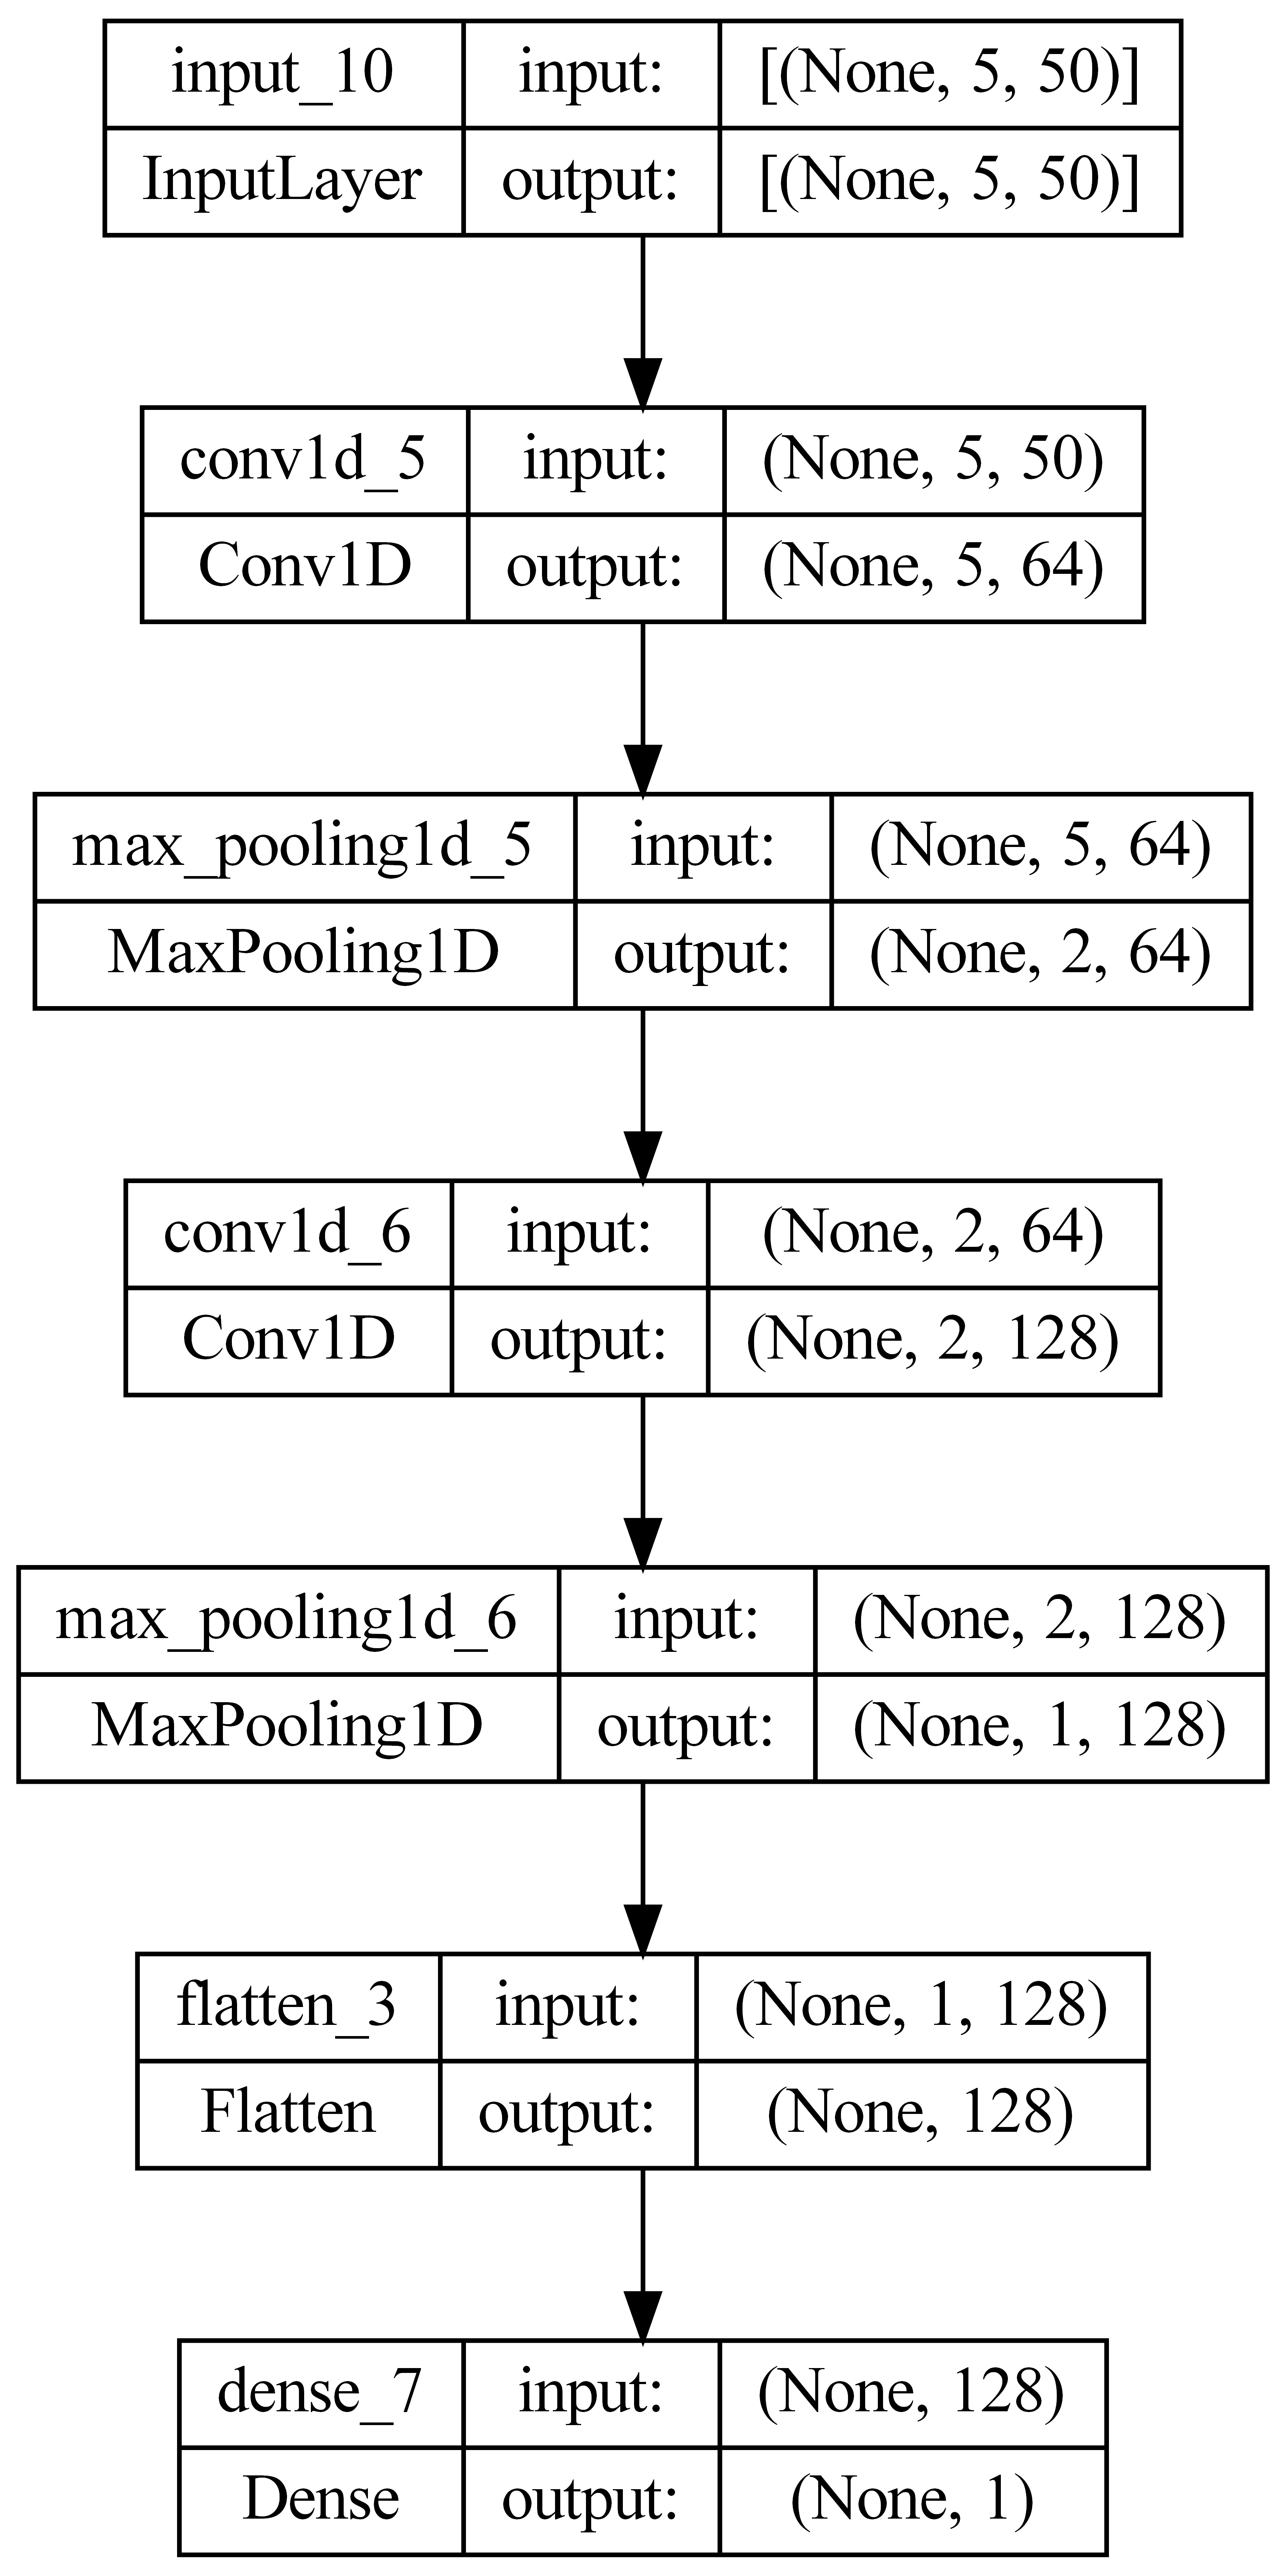

This is the model architecture of BiLSTM:


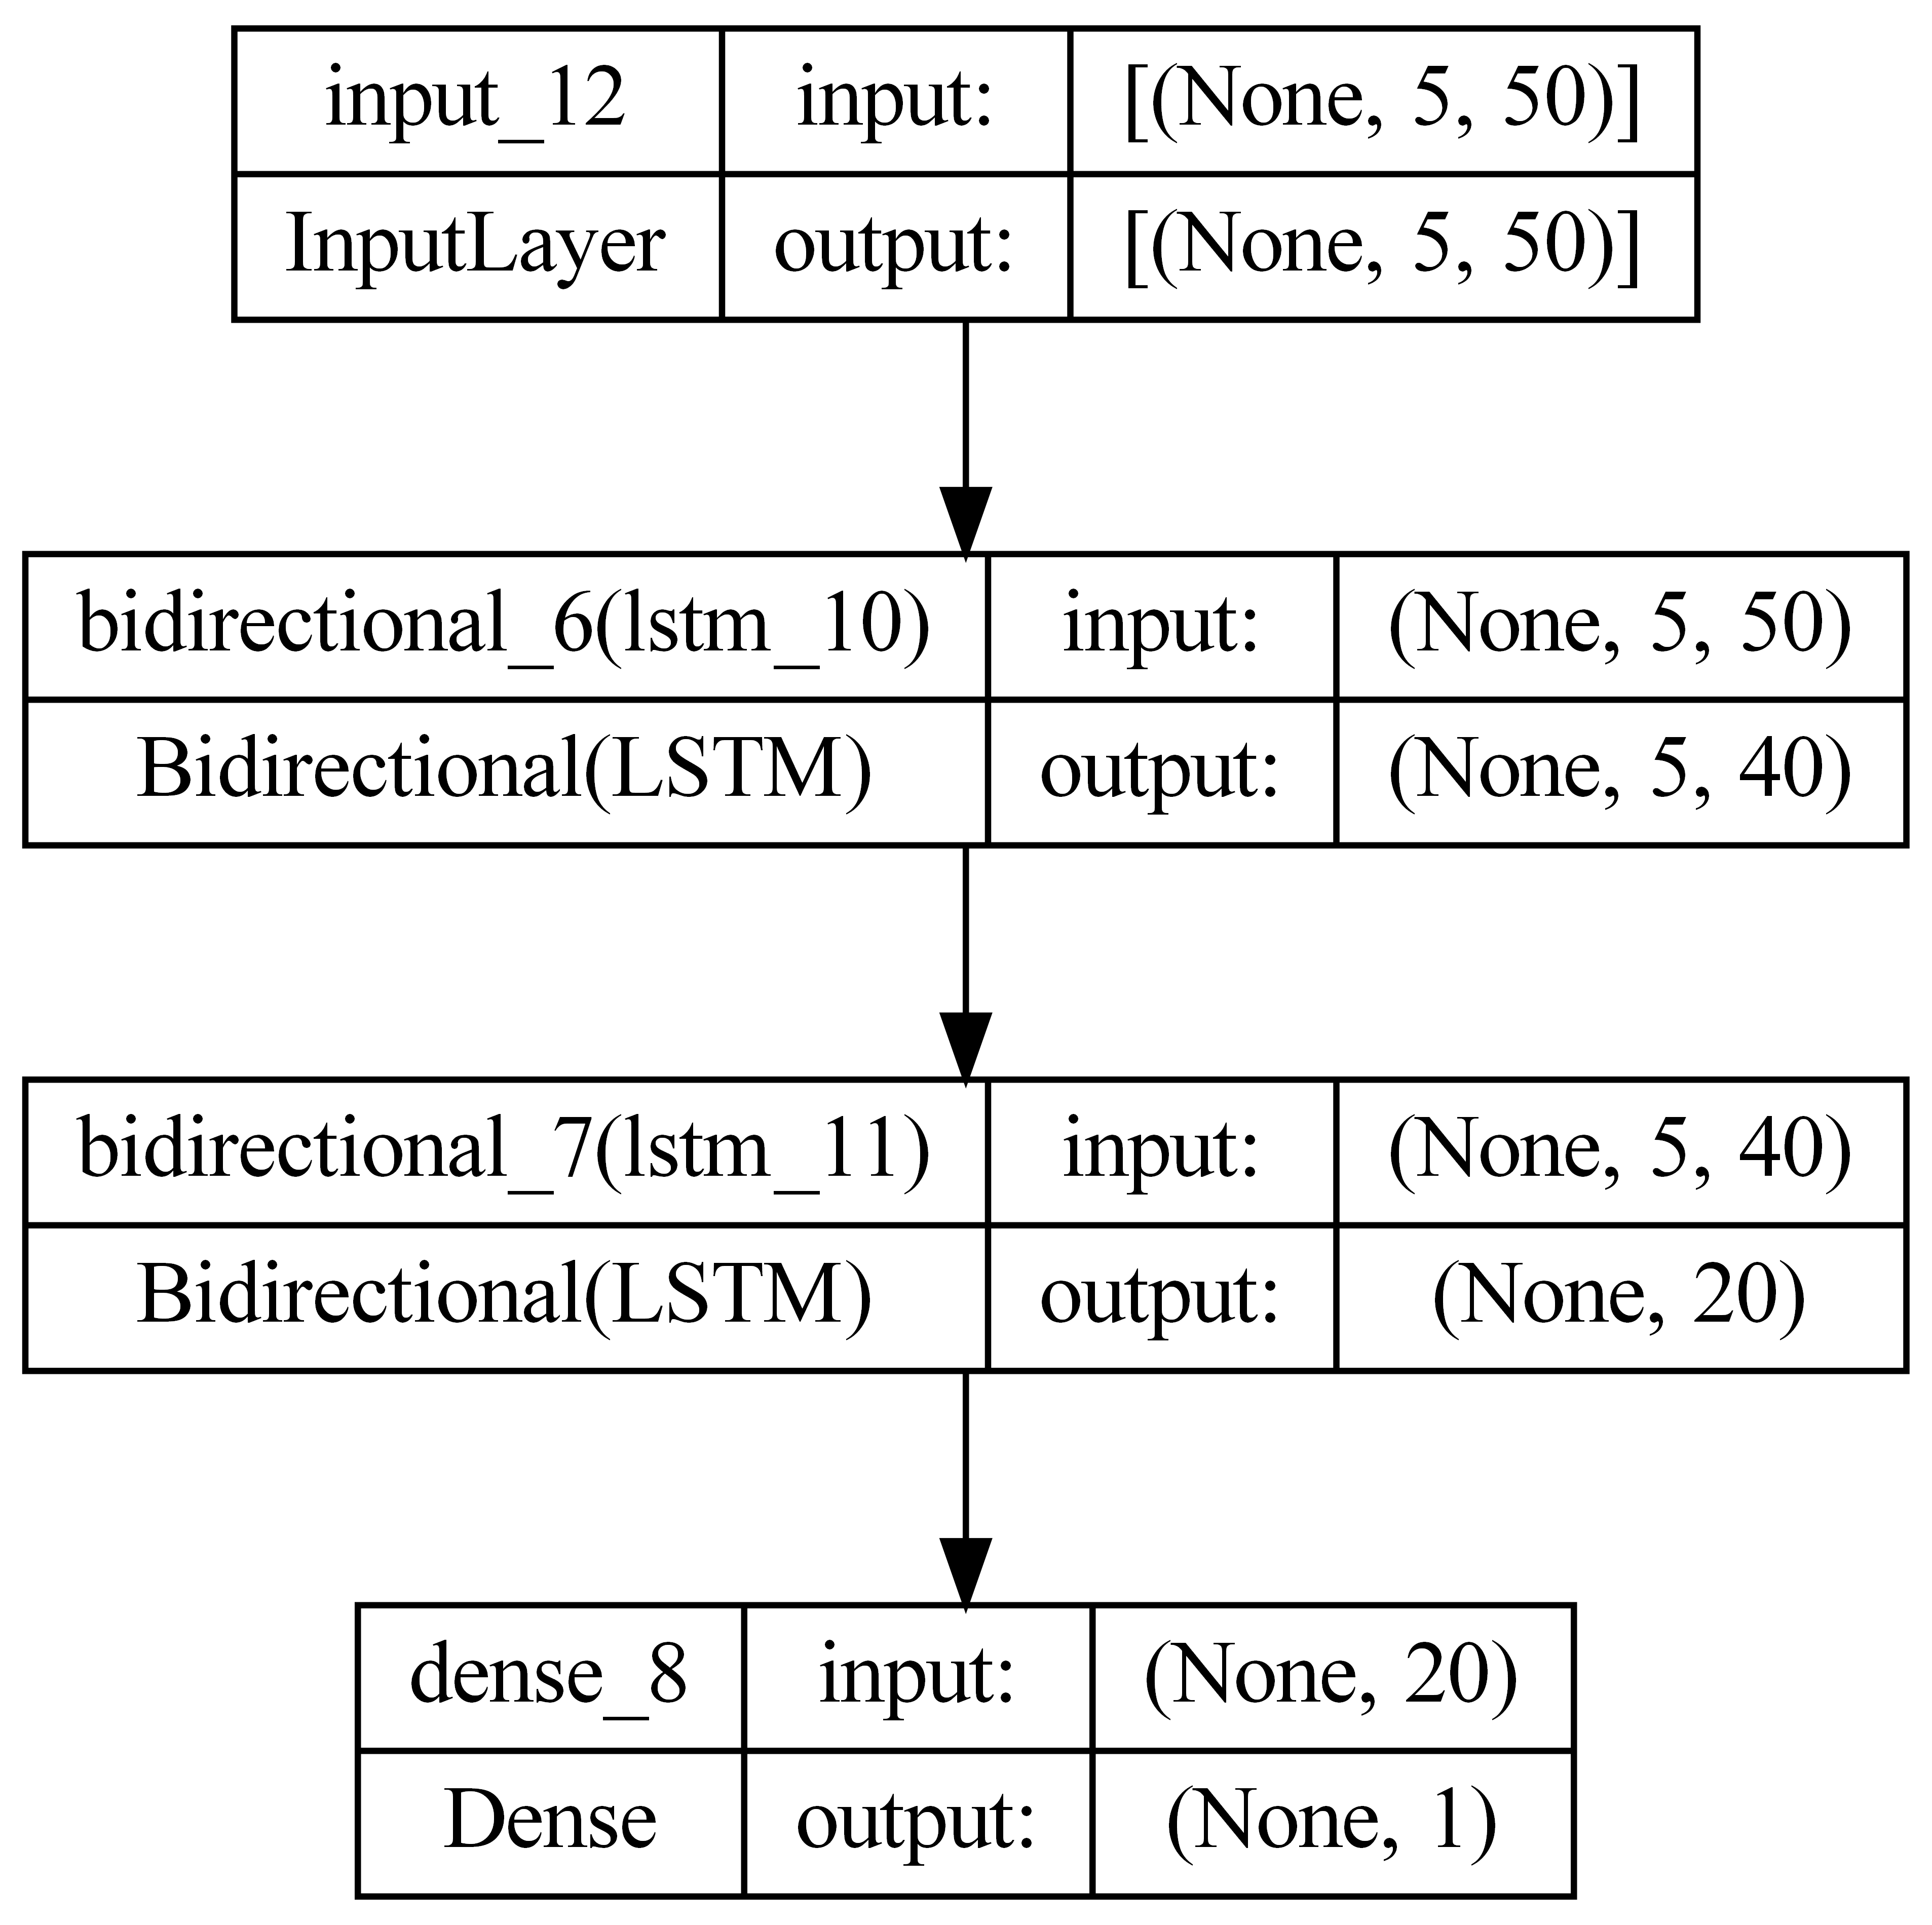

This is the model architecture of CNN-BiLSTM Sequential:


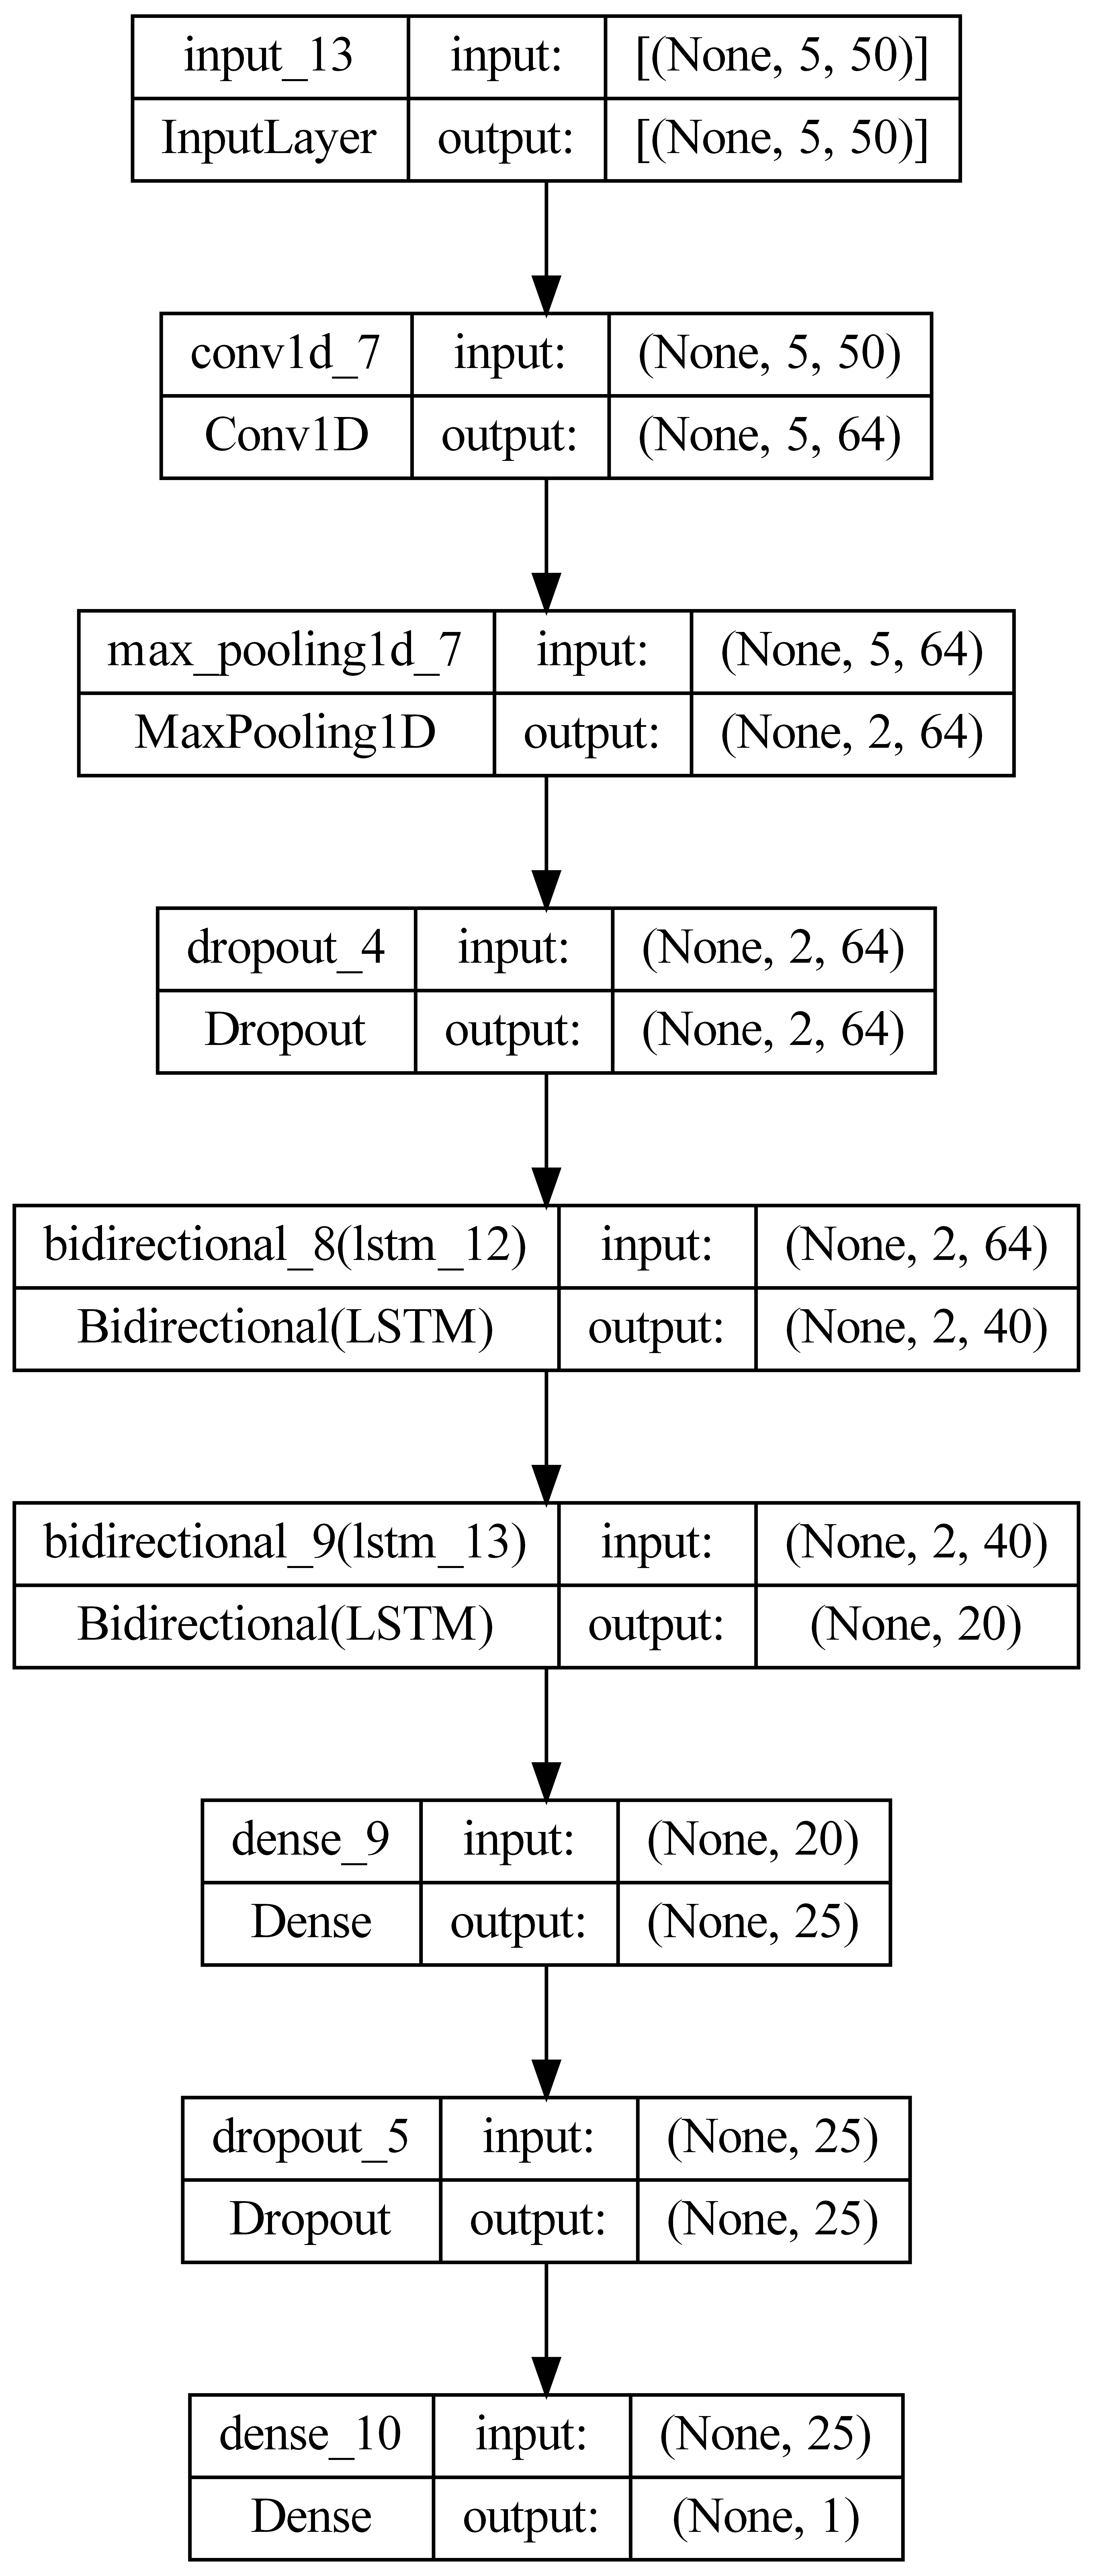

This is the model architecture of CNN-BiLSTM Parallel:


In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import model_to_dot
from IPython.display import Image as IPythonImage

# Define custom objects for loading models with custom metrics
custom_objects = {'rmse': rmse, 'rmse_percentage': rmse_percentage}

# Dictionary of models to load and their paths
models = {
    'Autoencoder': './pretrained_model/Autoencoder.h5',
    'CNN': './pretrained_model/cnn_model.h5',
    'BiLSTM': './pretrained_model/Bilstm_model.h5',
    'CNN-BiLSTM Sequential': './pretrained_model/CNN_Bilstm_sequential_Model.h5',
    'CNN-BiLSTM Parallel': './pretrained_model/CNN_Bilstm_parallel_Model.h5'
}

# Path for saving images
image_path = './graph_model_architecture/'

# Loop through the models, load, plot, save, and display each architecture with higher resolution
for name, model_path in models.items():
    # Load the model using custom objects if there are custom metrics or layers
    model = load_model(model_path, custom_objects=custom_objects)
    
    # Convert model to dot format and increase image resolution using the 'dpi' argument
    dot = model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=900)  # Adjust DPI for higher resolution
    
    # Save the dot to a PNG file
    png_path = f'{image_path}{name}.png'
    dot.write_png(png_path)
    
    # Print the name of the model architecture
    print(f"This is the model architecture of {name}:")
    
    # Display the saved image in IPython notebook
    display(IPythonImage(filename=png_path))
